In [1]:
# import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import backend as K

num_classes = 7
#img_rows, img_cols = 605, 700
img_rows, img_cols = 140, 140

# 引入Tensorboard
from keras.callbacks import TensorBoard
from keras.utils import plot_model

Using TensorFlow backend.


In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

def read_image(img_name):
    im = Image.open(img_name).convert('RGB')
    #im.save(img_name+".jpg")
    #im = tf.gfile.FastGFile(img_name, 'rb').read()
    #img_data = tf.image.decode_jpeg(im)
    #img_data = tf.image.convert_image_dtype(img_data, dtype=tf.float32)
    #resized = tf.image.resize_images(img_data, [30, 30], method=0)
    #print(resized)
    #im.show()
    data = np.array(im)
    return data

images = []

filename = os.listdir('D://alldata/all_black140gauss1')
#print(filename)
for fn in filename:
    if fn.endswith('.jpg'):
        fd = os.path.join('D://alldata/all_black140gauss1',fn)
        #print(fd[3])
        #data1 = read_image(fd)
        #data2 = tf.image.convert_image_dtype(data1, dtype=tf.float32)
        #data3 = tf.image.resize_images(data2, [30, 30], method=0) 
        #images.append(data3)
        images.append(read_image(fd))
print('load success!')
X = np.array(images)
print (X.shape)
#print(X[1])




        


load success!
(1758, 140, 140, 3)


In [3]:
import csv
csv_reader = csv.reader(open("D://alldata/labels1.csv"))
for row in csv_reader:
    column1 = [row[0]for row in csv_reader]
    #print(column1)
    

Y = np.array(column1)
print(Y[4])



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)


img_type = 3

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], img_type, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_type, img_rows, img_cols)
    input_shape = (img_type, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_type)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_type)
    input_shape = (img_rows, img_cols, img_type)
    
    
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


for i in range(len(Y_train)):
    if Y_train[i] == 'Basal': #Basal cell of prostate epithelium  前列腺上皮基底细胞（1136）
        Y_train[i] = 0
    elif Y_train[i] == 'CNS': #CNS neuron (sensu Vertebrata) 中枢神经系统神经元（椎骨感觉）（356）
        Y_train[i] = 1
    elif Y_train[i] == 'NEUTROPHIL': #中性白细胞
        Y_train[i] = 2
    elif Y_train[i] == 'BASOPHIL': #嗜碱细胞
        Y_train[i] = 3
    elif Y_train[i] == 'EOSINOPHIL': #嗜酸红细胞
        Y_train[i] = 4
    elif Y_train[i] == 'MONOCYTE': #单核白血球
        Y_train[i] = 5
    elif Y_train[i] == 'LYMPHOCYTE': #淋巴细胞
        Y_train[i] = 6
    else:
        print('ERROR')
        
for i in range(len(Y_test)):
    if Y_test[i] == 'Basal': #Basal cell of prostate epithelium  前列腺上皮基底细胞（1136）
        Y_test[i] = 0
    elif Y_test[i] == 'CNS': #CNS neuron (sensu Vertebrata) 中枢神经系统神经元（椎骨感觉）（356）
        Y_test[i] = 1
    elif Y_test[i] == 'NEUTROPHIL': #中性白细胞
        Y_test[i] = 2
    elif Y_test[i] == 'BASOPHIL': #嗜碱细胞
        Y_test[i] = 3
    elif Y_test[i] == 'EOSINOPHIL': #嗜酸红细胞
        Y_test[i] = 4
    elif Y_test[i] == 'MONOCYTE': #单核白血球
        Y_test[i] = 5
    elif Y_test[i] == 'LYMPHOCYTE': #淋巴细胞
        Y_test[i] = 6
    else:
        print('ERROR')

print(Y_train)
print(Y_test)



NEUTROPHIL
['0' '0' '1' ..., '1' '0' '0']
['0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '2' '2' '1' '5' '4' '0' '0' '0'
 '2' '4' '0' '0' '2' '0' '0' '0' '1' '6' '2' '4' '1' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '2' '1' '0' '1' '0' '4' '1' '0'
 '1' '0' '6' '0' '0' '0' '0' '0' '0' '4' '0' '2' '1' '0' '0' '2' '0' '4'
 '0' '0' '0' '4' '1' '6' '0' '0' '1' '4' '2' '0' '5' '0' '1' '0' '1' '0'
 '0' '2' '1' '6' '0' '0' '0' '2' '6' '0' '0' '0' '0' '2' '0' '0' '0' '0'
 '2' '0' '1' '0' '0' '0' '4' '0' '1' '0' '5' '0' '1' '1' '3' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0'
 '0' '0' '1' '4' '1' '0' '2' '1' '2' '2' '2' '0' '0' '0' '0' '0' '2' '2'
 '0' '0' '0' '0' '0' '1' '0' '1' '2' '4' '0' '0' '1' '0' '5' '0' '0' '0'
 '0' '0' '0' '0' '0' '2' '0' '0' '4' '1' '1' '0' '1' '0' '0' '4' '0' '0'
 '0' '2' '0' '0' '1' '4' '2' '0' '0' '1' '0' '0' '0' '2' '4' '0' '4' '0'
 '0' '4' '0' '0' '1' '0' '0' '0' '0' '4' '1' '0' '0' '6' '0' '0' '0' '1'
 '0' '2' 

In [4]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [5]:
model = Sequential()
#一层深度为32，过滤器大小为5*5的卷积层
model.add(
    Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape) )

#一层过滤器大小为2*2的最大池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

#一层深度为64，过滤器大小为5*5的卷积层
model.add(
    Conv2D(64, kernel_size=(5,5), activation='relu') )

#一层过滤器大小为2*2的最大池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

#将卷积层的输出拉直后作为下面全连接层的输入
model.add(Flatten())

#全连接层，有500个节点
model.add(Dense(500, activation='relu'))

#全连接层，得到最后的输出
model.add(Dense(num_classes, activation='softmax'))

In [6]:
#sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=1e-6, nesterov=True)
#adam = keras.optimizers.adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=1e-6,amsgrad=False)
adadelta = keras.optimizers.Adadelta(lr=0.001,rho=0.95,epsilon=None,decay=0)
#adagrad = keras.optimizers.Adagrad(lr=0.001,epsilon=None,decay=0)

In [7]:
#定义损失函数，优化函数和评测方法
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adadelta, metrics=['accuracy'])
#optimizer=keras.optimizers.SGD()

history = model.fit(X_train, Y_train, batch_size=64, epochs=320, validation_data=(X_test, Y_test))

Train on 1406 samples, validate on 352 samples
Epoch 1/320
1406/1406 [==============================] - 61s 44ms/step - loss: 1.6614 - acc: 0.5455 - val_loss: 1.5239 - val_acc: 0.6051
Epoch 2/320
1406/1406 [==============================] - 64s 45ms/step - loss: 1.4634 - acc: 0.5747 - val_loss: 1.3989 - val_acc: 0.6051
Epoch 3/320
1406/1406 [==============================] - 64s 45ms/step - loss: 1.3654 - acc: 0.5775 - val_loss: 1.3335 - val_acc: 0.6023
Epoch 4/320
1406/1406 [==============================] - 64s 46ms/step - loss: 1.2990 - acc: 0.5797 - val_loss: 1.2892 - val_acc: 0.5938
Epoch 5/320
1406/1406 [==============================] - 64s 46ms/step - loss: 1.2582 - acc: 0.5846 - val_loss: 1.2538 - val_acc: 0.6761
Epoch 6/320
1406/1406 [==============================] - 65s 46ms/step - loss: 1.2207 - acc: 0.6110 - val_loss: 1.2256 - val_acc: 0.6534
Epoch 7/320
1406/1406 [==============================] - 66s 47ms/step - loss: 1.1799 - acc: 0.6302 - val_loss: 1.2002 - val_acc: 0

1406/1406 [==============================] - 65s 46ms/step - loss: 0.9170 - acc: 0.6856 - val_loss: 0.9689 - val_acc: 0.6818
Epoch 61/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9194 - acc: 0.6807 - val_loss: 0.9886 - val_acc: 0.6648
Epoch 62/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9204 - acc: 0.6785 - val_loss: 0.9803 - val_acc: 0.6705
Epoch 63/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9118 - acc: 0.6828 - val_loss: 0.9617 - val_acc: 0.6818
Epoch 64/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9139 - acc: 0.6735 - val_loss: 0.9623 - val_acc: 0.6818
Epoch 65/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9051 - acc: 0.6821 - val_loss: 0.9638 - val_acc: 0.6818
Epoch 66/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.9109 - acc: 0.6799 - val_loss: 0.9673 - val_acc: 0.6818
Epoch 67/320
1406/1406 [=======================

1406/1406 [==============================] - 64s 46ms/step - loss: 0.7963 - acc: 0.6942 - val_loss: 0.8456 - val_acc: 0.6705
Epoch 120/320
1406/1406 [==============================] - 64s 46ms/step - loss: 0.7904 - acc: 0.6977 - val_loss: 0.8360 - val_acc: 0.6733
Epoch 121/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.7988 - acc: 0.6863 - val_loss: 0.8263 - val_acc: 0.7017
Epoch 122/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.7855 - acc: 0.6991 - val_loss: 0.8378 - val_acc: 0.6705
Epoch 123/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.7885 - acc: 0.6856 - val_loss: 0.8194 - val_acc: 0.6989
Epoch 124/320
1406/1406 [==============================] - 64s 46ms/step - loss: 0.7746 - acc: 0.6970 - val_loss: 0.8339 - val_acc: 0.6676
Epoch 125/320
1406/1406 [==============================] - 64s 46ms/step - loss: 0.7794 - acc: 0.6913 - val_loss: 0.8192 - val_acc: 0.6847
Epoch 126/320
1406/1406 [================

1406/1406 [==============================] - 64s 46ms/step - loss: 0.6982 - acc: 0.6899 - val_loss: 0.7286 - val_acc: 0.7017
Epoch 179/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6940 - acc: 0.6991 - val_loss: 0.7254 - val_acc: 0.6989
Epoch 180/320
1406/1406 [==============================] - 64s 46ms/step - loss: 0.7022 - acc: 0.6956 - val_loss: 0.7297 - val_acc: 0.7017
Epoch 181/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.7011 - acc: 0.6949 - val_loss: 0.7300 - val_acc: 0.7017
Epoch 182/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6900 - acc: 0.6927 - val_loss: 0.7329 - val_acc: 0.6818
Epoch 183/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6896 - acc: 0.6935 - val_loss: 0.7269 - val_acc: 0.7017
Epoch 184/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6873 - acc: 0.7063 - val_loss: 0.7415 - val_acc: 0.6676
Epoch 185/320
1406/1406 [================

1406/1406 [==============================] - 65s 46ms/step - loss: 0.6615 - acc: 0.7105 - val_loss: 0.7034 - val_acc: 0.7074
Epoch 238/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6667 - acc: 0.7020 - val_loss: 0.7027 - val_acc: 0.7045
Epoch 239/320
1406/1406 [==============================] - 66s 47ms/step - loss: 0.6629 - acc: 0.7034 - val_loss: 0.6981 - val_acc: 0.7017
Epoch 240/320
1406/1406 [==============================] - 66s 47ms/step - loss: 0.6676 - acc: 0.7006 - val_loss: 0.6977 - val_acc: 0.7017
Epoch 241/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6576 - acc: 0.6999 - val_loss: 0.6936 - val_acc: 0.7045
Epoch 242/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6547 - acc: 0.7034 - val_loss: 0.7003 - val_acc: 0.7045
Epoch 243/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6603 - acc: 0.6949 - val_loss: 0.6953 - val_acc: 0.7074
Epoch 244/320
1406/1406 [================

1406/1406 [==============================] - 65s 46ms/step - loss: 0.6348 - acc: 0.7055 - val_loss: 0.6855 - val_acc: 0.7074
Epoch 297/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6314 - acc: 0.6991 - val_loss: 0.6832 - val_acc: 0.7074
Epoch 298/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6478 - acc: 0.7098 - val_loss: 0.6761 - val_acc: 0.7045
Epoch 299/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6412 - acc: 0.7112 - val_loss: 0.6778 - val_acc: 0.7045
Epoch 300/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6358 - acc: 0.7119 - val_loss: 0.6782 - val_acc: 0.7045
Epoch 301/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6377 - acc: 0.7048 - val_loss: 0.6783 - val_acc: 0.7045
Epoch 302/320
1406/1406 [==============================] - 65s 46ms/step - loss: 0.6342 - acc: 0.6977 - val_loss: 0.6875 - val_acc: 0.6989
Epoch 303/320
1406/1406 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


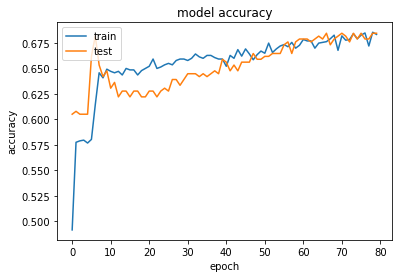

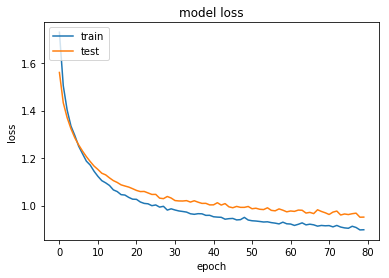

In [8]:
# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()